In [1]:
## in this notebook, i am going to perform clustering operation on the customer dataset. Cluster is an unsuoervised machinelearning technique

In [2]:
## which helps to group the customers based on their pusrchase records.

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer


# preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


C:\Users\prasad ayithireddy\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
!pip install yellowbrick

In [5]:
## Settings i wanna do

pd.set_option("display.max_columns",None)

###  Loading the data

In [6]:
data = pd.read_excel("marketing_campaign.xlsx")


In [7]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
data.shape

(2240, 29)

### EDA

####  Descriptive Analytics

In [9]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### Observation 

-> No charector which representss values present in the dataset

-> Income -- has 1% missing values - so we can handle this easily

-> Dt_customer -- columns has the date value but not in date time object ..so we can handle

-> 3 categorical variables ..we need to handle



In [11]:
numerical_data = data.select_dtypes(include=['number']).columns.tolist()

In [12]:
numerical_data

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [13]:
data[numerical_data].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##### Observation :

-> The dataset has some large values and some with 0s and 1s ..so scaling must

-> all the features having the skewness -- Outlier detection and removal needed


In [14]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [15]:
categorical_columns

['Education', 'Marital_Status', 'Dt_Customer']

#### Univariate analysis


<Axes: xlabel='Education', ylabel='count'>

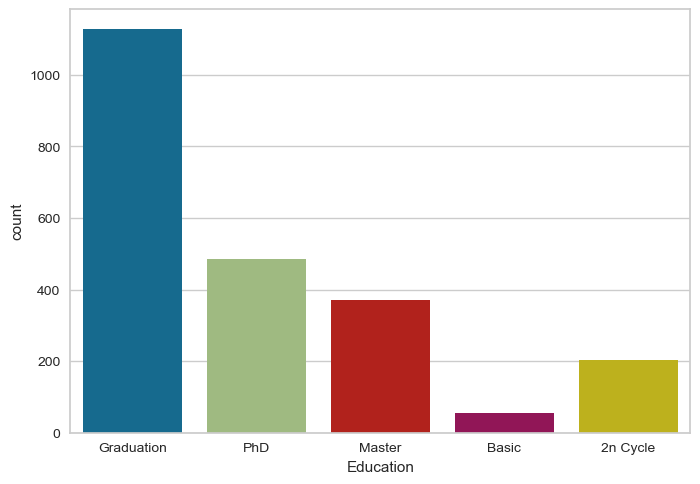

In [16]:
# Categorical Data

sns.countplot(data=data,x="Education")

<Axes: xlabel='Marital_Status', ylabel='count'>

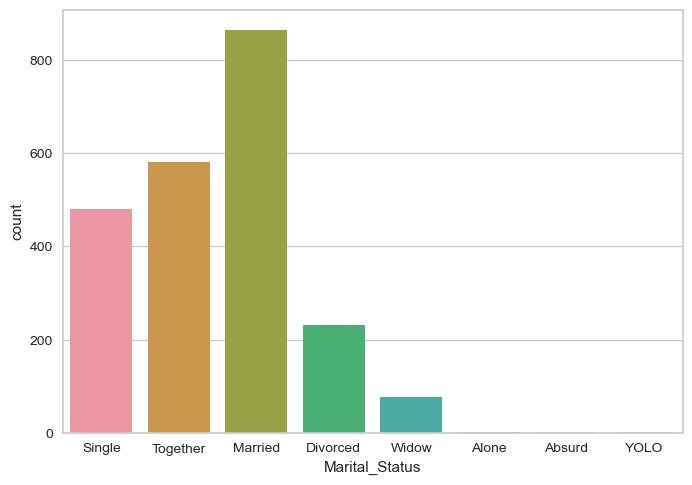

In [17]:
sns.countplot(data=data, x="Marital_Status")

### Feature Engineering

##### In this section, i am going to create some features from the exsisting features

-: Age from Year_Birth

-> Total_childers by adding Kidhome and Teenhome

-> Being customer from Dt_Customer (Dt_Customer -- represents the joing date of the customer)

-> Total purches by adding MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds

-> Parent -- going to be a decrete value -- 1 if they have children, 0 otherwise

-> loving product -- which product they buy mostly outof -- MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds

##### Feature removal

AcceptedCmpn -- columns can be removed

In [18]:
data["Age"] = 2022 - data["Year_Birth"]   ## generatong age

In [19]:
data["Age"]

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64

In [20]:
data["Kidhome"]+data["Teenhome"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Length: 2240, dtype: int64

In [21]:
# generating Total_childers

data["Total_childers"]  =  data["Kidhome"] + data["Teenhome"]

In [22]:
data.Total_childers

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_childers, Length: 2240, dtype: int64

In [23]:
# Generating Being customer from  Dt_Customer
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

# Today's date
today = pd.to_datetime("today")

# Calculate days since customer joined
data["days"] = (today - data["Dt_Customer"]).dt.days


In [24]:
data.days

0       4764
1       4214
2       4413
3       4240
4       4262
        ... 
2235    4482
2236    4120
2237    4256
2238    4257
2239    4723
Name: days, Length: 2240, dtype: int64

In [25]:
# Total purches
data["Total purches"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

In [26]:
data["Total purches"]

0       1445
1         25
2        665
3         43
4        376
        ... 
2235    1299
2236     444
2237    1209
2238     763
2239     170
Name: Total purches, Length: 2240, dtype: int64

In [27]:
# is customer is parent or not

data["parent"] = np.where(data["Total_childers"]>0,1,0)


In [28]:
data.parent

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: parent, Length: 2240, dtype: int32

In [29]:
data["loving product"] = data[["MntWines","MntFruits","MntMeatProducts","MntSweetProducts","MntGoldProds"]].idxmax(axis=1)

In [30]:
data["loving product"]

0              MntWines
1              MntWines
2              MntWines
3       MntMeatProducts
4              MntWines
             ...       
2235           MntWines
2236           MntWines
2237           MntWines
2238           MntWines
2239           MntWines
Name: loving product, Length: 2240, dtype: object

In [31]:
## data removal

drop_column= ["Dt_Customer", "Year_Birth", "ID", "Z_CostContact", "Z_Revenue", 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'] 
data = data.drop(drop_column, axis=1)

In [32]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_childers,days,Total purches,parent,loving product
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,65,0,4764,1445,0,MntWines
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,68,2,4214,25,1,MntWines
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,57,0,4413,665,0,MntWines
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,38,1,4240,43,1,MntMeatProducts
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,41,1,4262,376,1,MntWines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,55,1,4482,1299,1,MntWines
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,76,3,4120,444,1,MntWines
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,41,0,4256,1209,0,MntWines
2238,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,66,1,4257,763,1,MntWines


### Data Preprocessing

 -- > Null value removal
 
 -->  Outlier detection and removal
 
 -->  categoricalvalue to numerical value
 
 --> scaling data
 
 

##### Removal f numerical values

In [33]:
## remove null values

print(data.shape)

data.dropna(inplace=True)

print(data.shape)

(2240, 23)
(2216, 23)


##### Outlier detectin and removal

In [34]:
## outlier detectioin

numerical_col = data.select_dtypes(include=["int","float"]).columns


In [35]:
numerical_col

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Total_childers', 'days', 'Total purches', 'parent'],
      dtype='object')

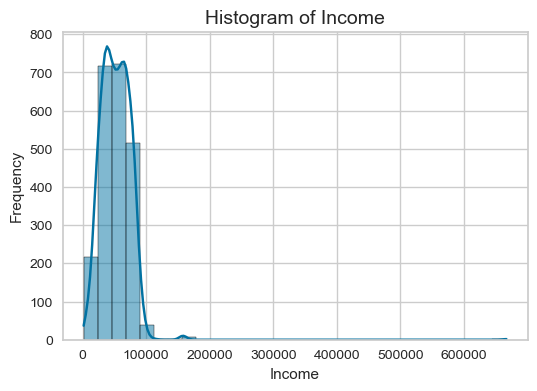

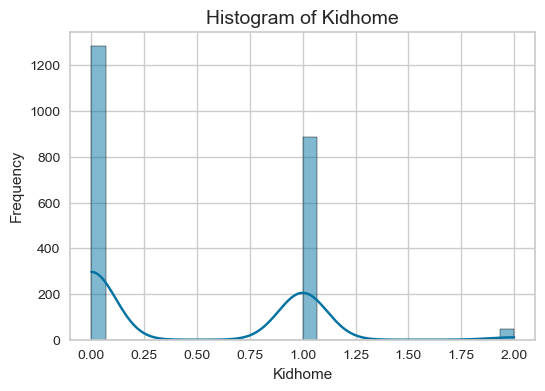

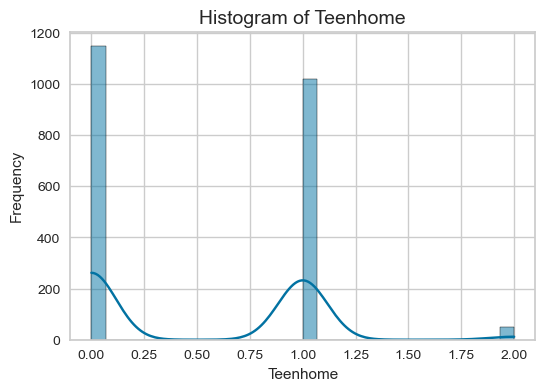

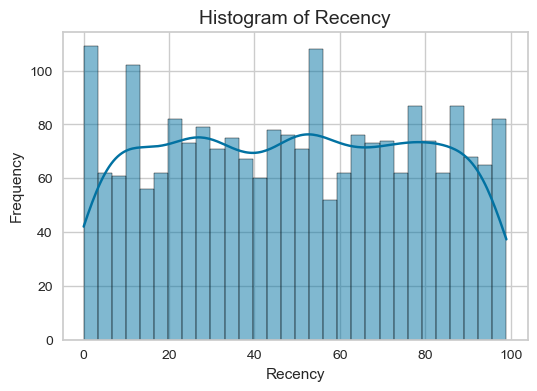

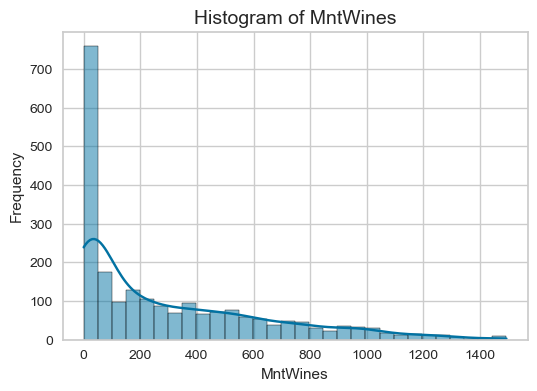

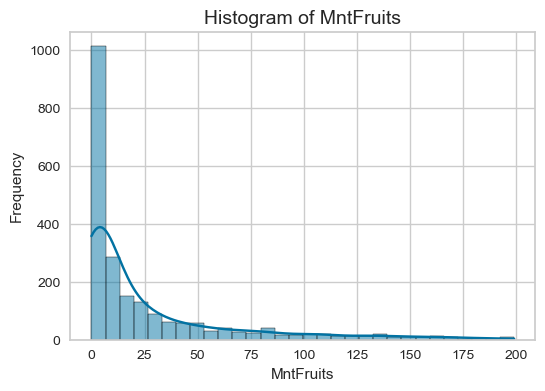

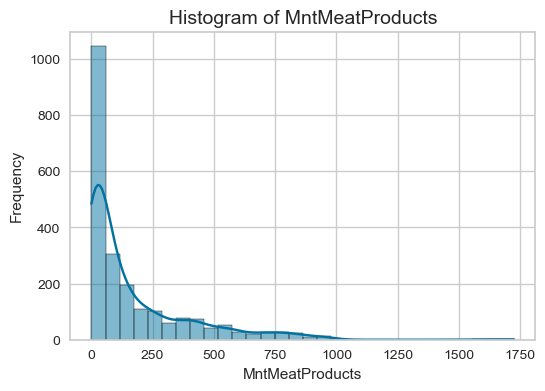

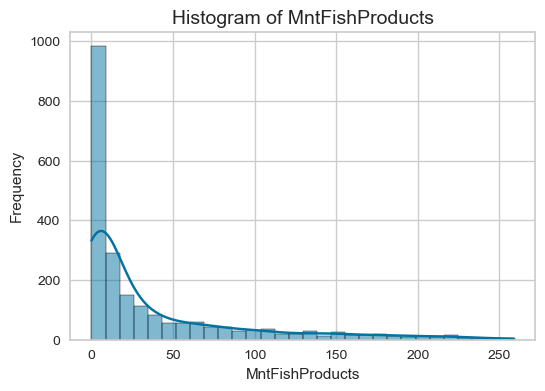

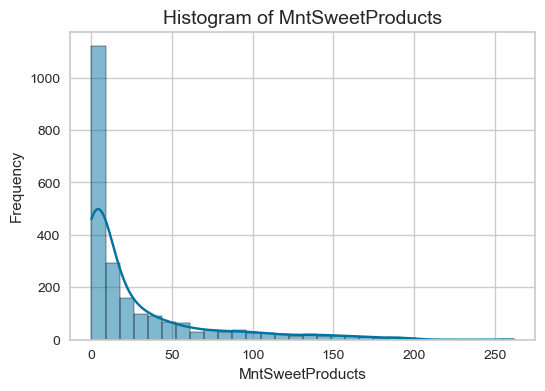

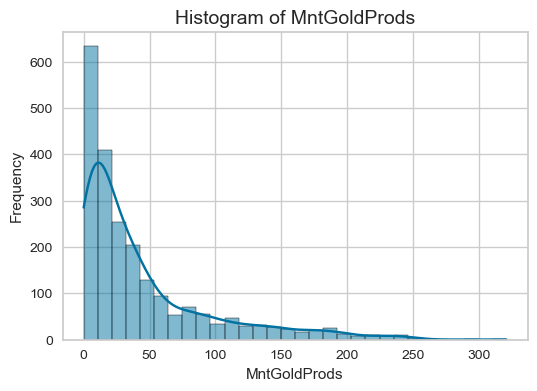

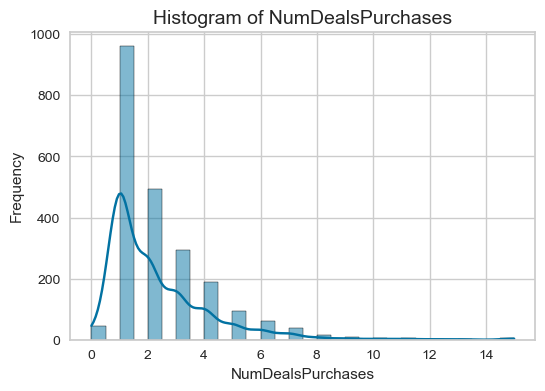

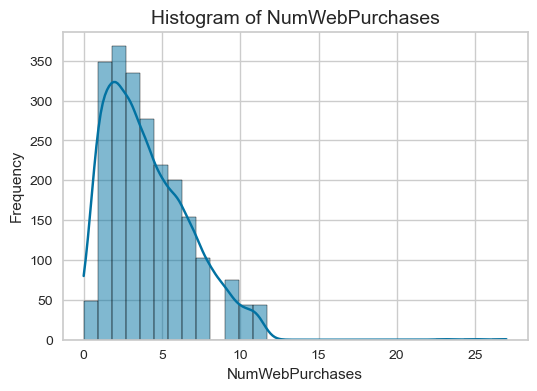

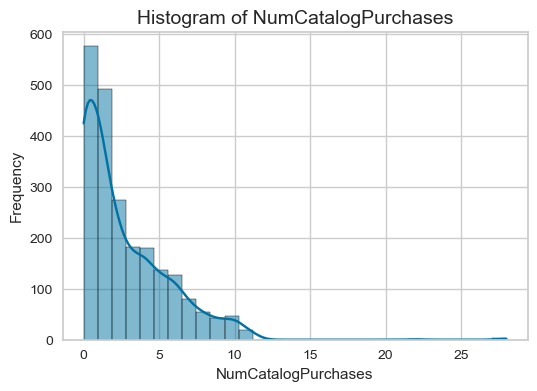

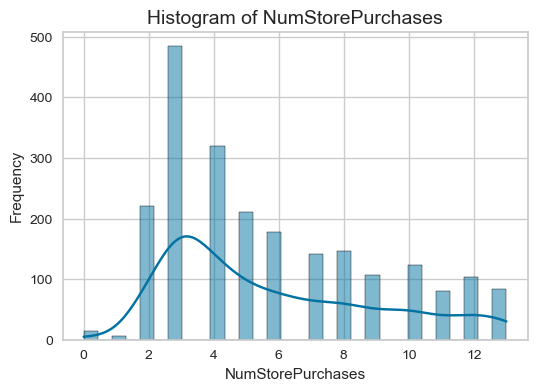

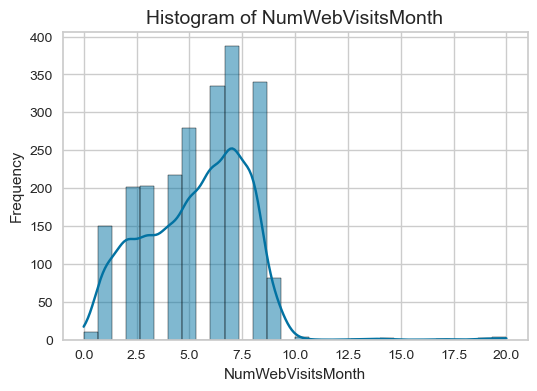

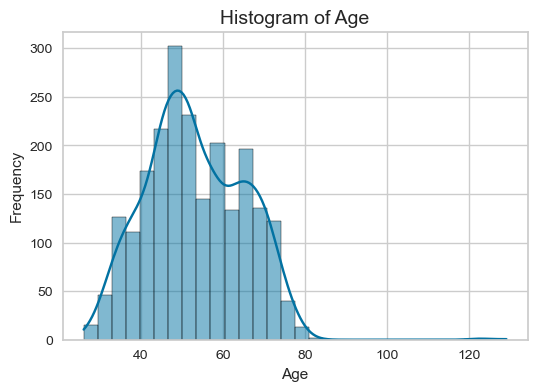

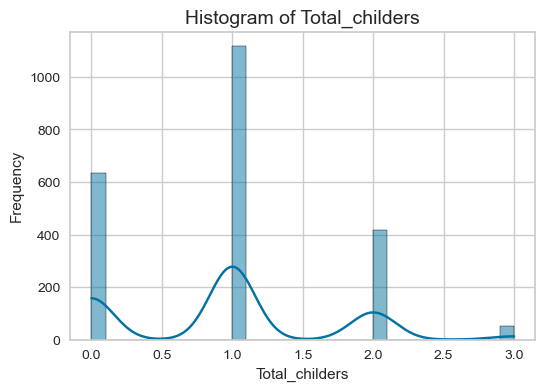

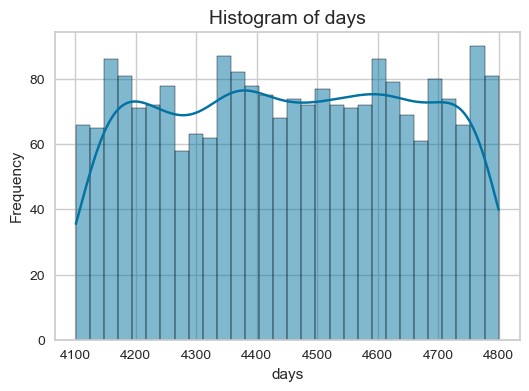

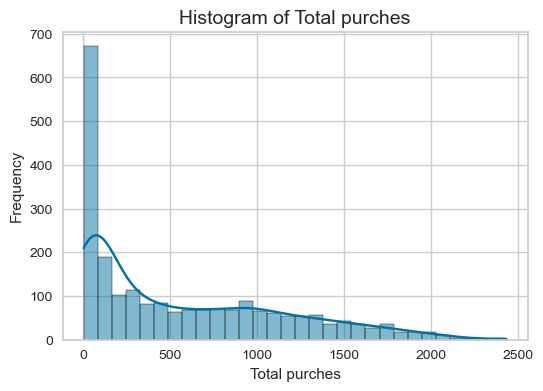

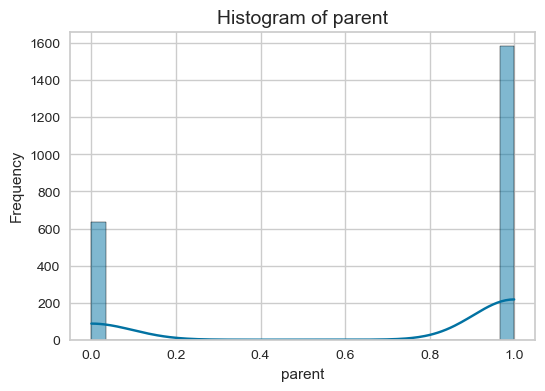

In [36]:
# Plot histograms for each column
for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col].dropna(), bins=30, kde=True)  # kde=True adds smooth curve
    plt.title(f"Histogram of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

##### observation >> 

-> most of the data in small range

-> age having data higher than 120, outlier

-> Very small datapoint in Income above 60,00,000 -- that can be a outlier here -- because we can't take decition based on that small rich customers

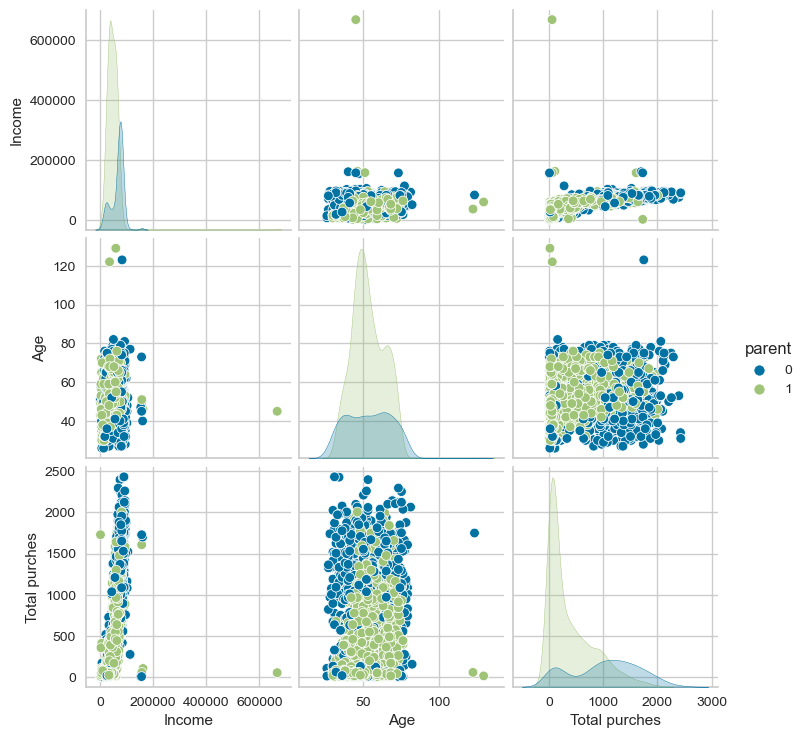

In [37]:
## paiplot to compare selected products

col = ["Income", "Age", "Total purches", "parent"]

sns.pairplot(data=data[col], hue="parent")

##### observation

-> Age and income having outliers -- that can be removed

-> we have people they are not parents up to 40 age

-> i think one or 2 datapoints having high salary

(2212, 23)


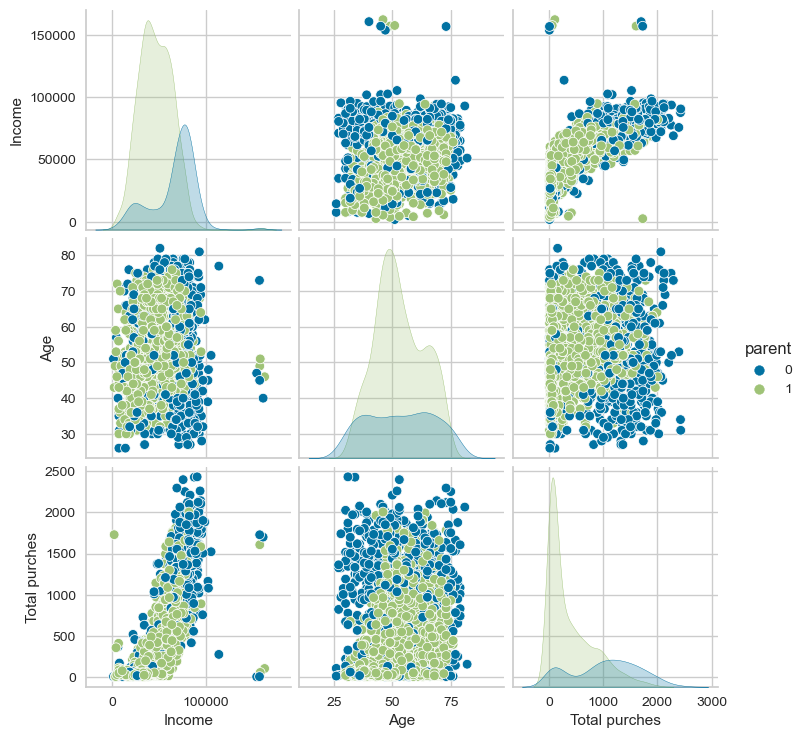

In [38]:
## outlier removal 

data = data.drop(data[data["Age"]>100].index)

data = data.drop(data[data["Income"]>400000].index)

print(data.shape)

## plotting the data after removal of outliers
col=["Income", "Age","Total purches", "parent"] 
sns.pairplot(data=data[col],hue="parent")

##### Categorical value to numerical value

<Axes: xlabel='loving product', ylabel='count'>

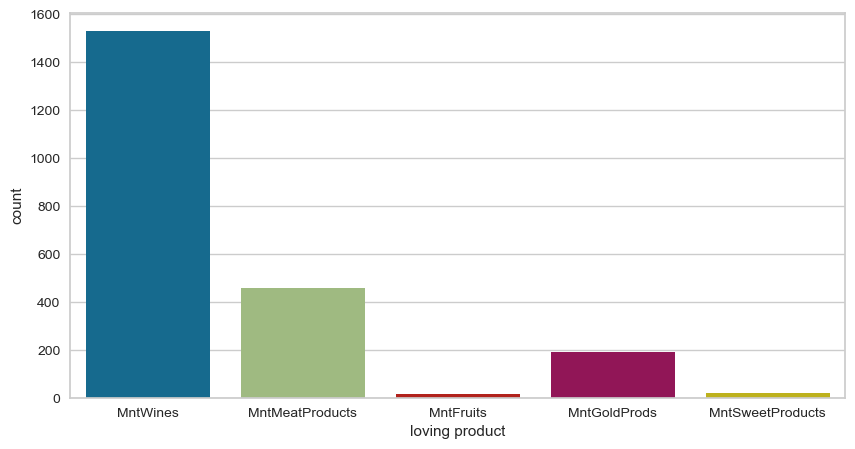

In [39]:
# befre this i wanna see which product purshed by the customer -- love Wines more than other products
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="loving product")

In [40]:
## label encoding -- because dont want to get more featurees

col_to_change = ["Education","Marital_Status","loving product"]

label_encod = LabelEncoder()

for col in col_to_change:
    data[col] = label_encod.fit_transform(data[col])
    


In [41]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_childers,days,Total purches,parent,loving product
0,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,65,0,4764,1445,0,4
1,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,68,2,4214,25,1,4
2,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,57,0,4413,665,0,4
3,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,38,1,4240,43,1,2
4,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,41,1,4262,376,1,4


##### Scaling feature


In [42]:
scaler = Normalizer()

data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)


In [43]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_childers,days,Total purches,parent,loving product
0,0.000034,0.000069,0.996242,0.000000,0.000000,0.000994,0.010881,0.001508,0.009356,0.002947,0.001508,0.001508,0.000051,0.000137,0.000171,0.000069,0.000120,0.001114,0.000000,0.081635,0.024761,0.000000,0.000069
1,0.000043,0.000086,0.995890,0.000021,0.000021,0.000817,0.000236,0.000021,0.000129,0.000043,0.000021,0.000129,0.000043,0.000021,0.000021,0.000043,0.000107,0.001461,0.000043,0.090555,0.000537,0.000021,0.000086
2,0.000028,0.000070,0.998043,0.000000,0.000000,0.000362,0.005937,0.000683,0.001770,0.001547,0.000293,0.000585,0.000014,0.000111,0.000028,0.000139,0.000056,0.000794,0.000000,0.061502,0.009268,0.000000,0.000056
3,0.000074,0.000185,0.987572,0.000037,0.000000,0.000964,0.000408,0.000148,0.000741,0.000371,0.000111,0.000185,0.000074,0.000074,0.000000,0.000148,0.000222,0.001408,0.000037,0.157146,0.001594,0.000037,0.000074
4,0.000068,0.000051,0.997309,0.000017,0.000000,0.001608,0.002960,0.000736,0.002019,0.000787,0.000462,0.000257,0.000086,0.000086,0.000051,0.000103,0.000086,0.000701,0.000017,0.072917,0.006433,0.000017,0.000068


### PCA (Dimensionality Reduction)

Dimentionality redection is a technique, which is used to reduce the number of features in the data. we are having some correlated fearures and that can be removed -- may be in that way we will lose some data. In data reduction technique we have small rock of data lose.
I am going to use PCA for this now and gonna reduce to 3 features (i can plot that to)

In [105]:
pca = PCA(n_components=3)
data = pd.DataFrame(pca.fit_transform(data))
data.head()

,0,1,2
0,-0.027660,-0.012677,0.012465
1,-0.018488,0.005344,-0.008123
2,-0.047090,-0.005344,-0.004798
3,0.047458,0.013798,0.000961
4,-0.035866,-0.001538,-0.005441


### Deciding number of clusters

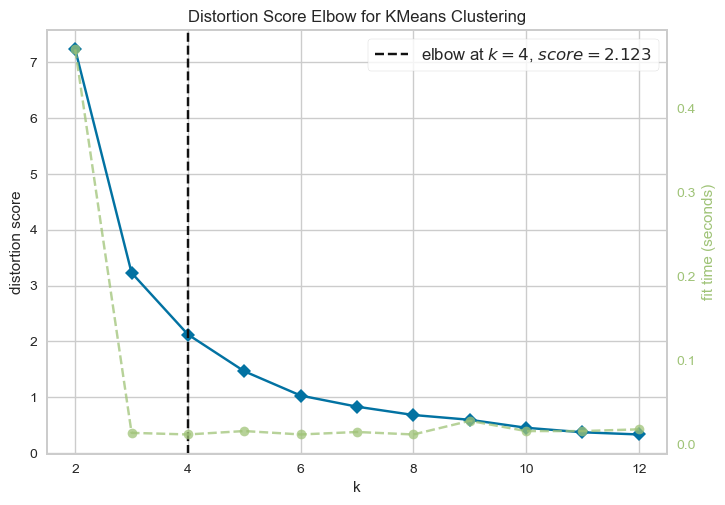

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [106]:
## here i am going to use Elbow method to find the best number of cluster


elbo = KElbowVisualizer(KMeans(),k = 12)
elbo.fit(data)
elbo.show()

#### This method says 4 would be the best number of cluster to choose

## Clustering

In [44]:
from sklearn.cluster import KMeans

# 1. Select only numerical columns
numerical_data = data.select_dtypes(include=["number"])

# 2. Make sure all column names are strings (important for sklearn >=1.0)
numerical_data.columns = numerical_data.columns.astype(str)

# 3. Fit KMeans
kmeans = KMeans(
    n_clusters=4, 
    init="k-means++", 
    max_iter=300, 
    n_init=10, 
    random_state=0
)

data["group"] = kmeans.fit_predict(numerical_data)

# 4. Check distribution of clusters
print(data["group"].value_counts())


group
0    1318
3     659
1     206
2      29
Name: count, dtype: int64


In [45]:
data.group

0       0
1       0
2       0
3       3
4       0
       ..
2207    0
2208    0
2209    0
2210    0
2211    0
Name: group, Length: 2212, dtype: int32

In [46]:
data["group"].value_counts()

group
0    1318
3     659
1     206
2      29
Name: count, dtype: int64

#### Plotting the data

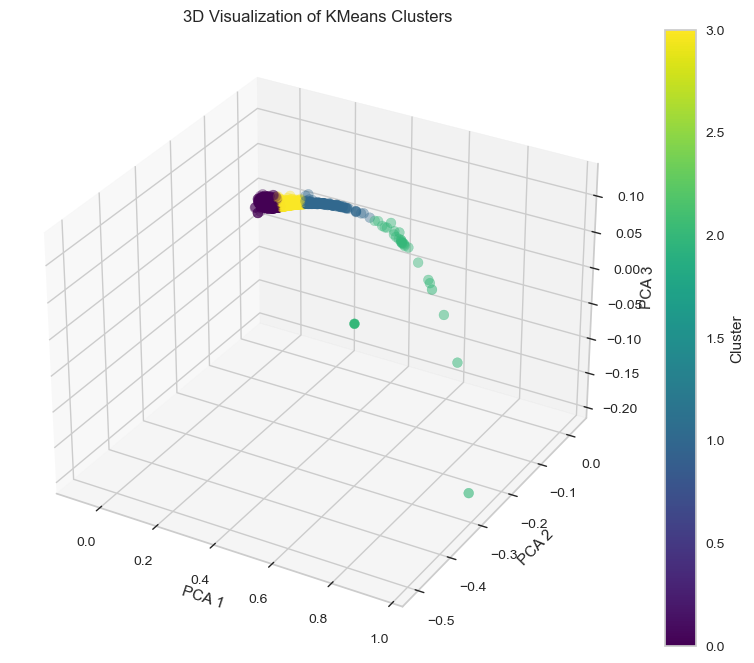

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduce numerical data to 3 principal components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(numerical_data)

# 3D scatter plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    pca_data[:,0], 
    pca_data[:,1], 
    pca_data[:,2], 
    c=data["group"], 
    cmap="viridis", 
    s=50
)

ax.set_title("3D Visualization of KMeans Clusters")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

plt.colorbar(sc, label="Cluster")
plt.show()


In this notebook i did un-supervised clustering of customer data. I used 4 clusters that i derived form the elbo method and used Kmeans for clustering. This can be used in planning better marketing strategies.